In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from losses import mse

In [25]:
class KNN:
    """
    Implements a simple K-Nearest Neighbors (KNN) classifier.

    Attributs:
    ----------
        n_neighbors (int): Number of neighbors to consider for classification (default: 3).
        metric (str): Distance metric to use ('euclidean' by default).

    Methods:
    -------
        fit(X, Y): Trains the model by storing the training data and their labels.
        predict(X): Predicts labels for a new set of data points.
    """
    
    def __init__(self, n_neighbors:int =3, metric: str = 'euclidean') -> None:
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.train_data = None
        self.train_target = None

    def fit(self, X: np.ndarray, Y: np.ndarray) -> None:
        """
        Stores the training data and corresponding labels.

        Parameters:
        ----------
            X (np.ndarray): Training data, with samples as rows.
            Y (np.ndarray): Labels for the training data.
        """
        self.train_data = X
        self.train_target = Y

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts labels for each sample in the input data.

        Parameters:
        ----------
            X (np.ndarray): Data to predict labels for, with samples as rows.

        Returns:
        -------
            np.ndarray: Predicted labels for each input sample.
        """
        return np.array([self._predict(x=sample) for sample in X])

    def _predict(self,x: np.ndarray) -> int:
        """
        Predicts the label for a single sample based on the nearest neighbors.

        Parameters:
        ----------
            x (np.ndarray): A single sample to predict the label for.

        Returns:
        -------
            int: Predicted label for the sample.
        """
        distances = None
        if self.metric == 'euclidean':
            distances = np.array([self.euclidean_distance(x1=x, x2=sample) for sample in self.train_data])

        nearest_index = np.argsort(a= distances)[:self.n_neighbors]
        nearest_labels = self.train_target[nearest_index]

        return np.bincount(nearest_labels).argmax()

    def euclidean_distance(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """
        Calculates the Euclidean distance between two samples.

        Parameters:
            x1 (np.ndarray): First sample.
            x2 (np.ndarray): Second sample.

        Returns:
            float: Euclidean distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2)**2, axis = 0))
    

    # -------------------- Dunder methods -----------------------------------------------------------

    def __str__(self) -> str:
        # Crée un dictionnaire pour représenter les attributs de l'instance sans transformation spéciale
        return f"KNN(n_neighbors={self.n_neighbors}, metric='{self.metric}')"
    
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(n_neighbors={self.n_neighbors}, metric='{self.metric}')"
    
    def __eq__(self, other) -> bool:
        if isinstance(other, self.__class__):
            return self.__dict__ == other.__dict__
        return False
    
    def __call__(self, X: np.ndarray) -> np.ndarray:
        return self.predict(X)


In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data = iris.data
y= iris.target

In [27]:
mask = y < 2
y = y[mask] 

In [28]:
y.shape

(100,)

In [29]:
data = data[mask,:]
data.shape

(100, 4)

In [30]:
data.shape

(100, 4)

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(data, y, test_size=0.2)

In [32]:
ytest.shape

(20,)

In [33]:
knn = KNN()

In [34]:
knn.fit(X=data, Y=y)

In [35]:
knn.predict(X=xtest)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [39]:
ytest

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [36]:
knn.predict(X=xtrain)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_true=ytest, y_pred=knn.predict(xtest))

1.0

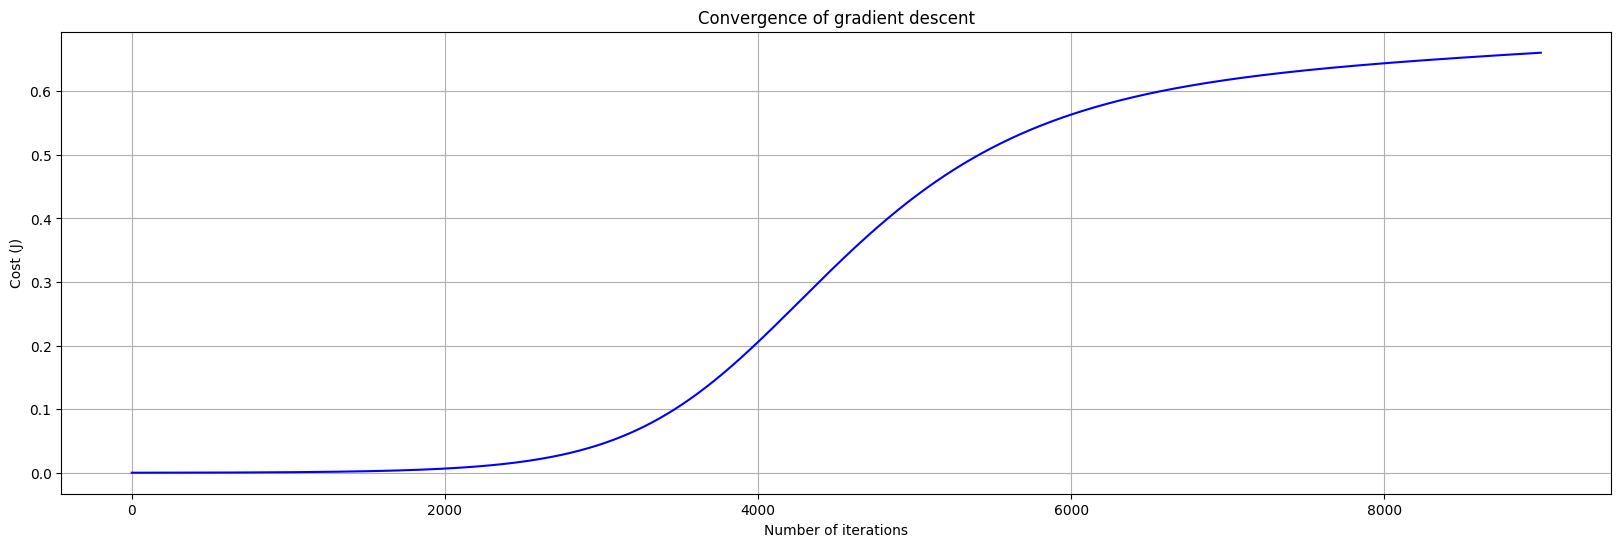

In [146]:
plt.plot(range(1, logistic.max_iterations + 1)[:9000], logistic.history[:9000], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [74]:
lr = LinearRegression(max_iterations=100000)

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])


y = np.dot(X, np.array([1, 2])) + 3

lr.fit(X, y)

In [75]:
lr

LinearRegression({'random_state': 42, 'learning_rate': 0.0001, 'max_iterations': 100000, 'stopping_threshold': 1e-06, 'W': array([2.08185111, 1.53335983, 2.02420127]), 'coef': array([1.53335983, 2.02420127]), 'intercept': 2.081851112878504})

In [76]:
lr.W

array([2.08185111, 1.53335983, 2.02420127])

In [79]:
lasso = Lasso(max_iterations=100000, alpha=5)
lasso.fit(X,y)

In [80]:
lasso

Lasso({'random_state': 42, 'learning_rate': 0.0001, 'max_iterations': 100000, 'stopping_threshold': 1e-06, 'W': array([6.88587789e-04, 6.33350112e-04, 2.94404509e+00]), 'coef': array([6.33350112e-04, 2.94404509e+00]), 'intercept': 0.0006885877885581932, 'alpha': 5})

In [83]:
ridge = Ridge(max_iterations=100000, alpha=5)
ridge.fit(X,y)

In [84]:
ridge

Ridge({'random_state': 42, 'learning_rate': 0.0001, 'max_iterations': 100000, 'stopping_threshold': 1e-06, 'W': array([0.68152746, 1.04890895, 1.41873589]), 'coef': array([1.04890895, 1.41873589]), 'intercept': 0.6815274642587479, 'alpha': 5})

In [87]:
elastic = ElasticNet(max_iterations=100000, alpha=5)
elastic.fit(X,y)
elastic

ElasticNet({'random_state': 42, 'learning_rate': 0.0001, 'max_iterations': 100000, 'stopping_threshold': 1e-06, 'W': array([0.31619305, 1.0045106 , 1.69327921]), 'coef': array([1.0045106 , 1.69327921]), 'intercept': 0.31619305367756706, 'alpha': 5, 'l1_ratio': 0.5})

In [88]:
a = 1.
b= 2.
alpha = a + b and l1_ratio = a / (a + b)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (867792159.py, line 3)

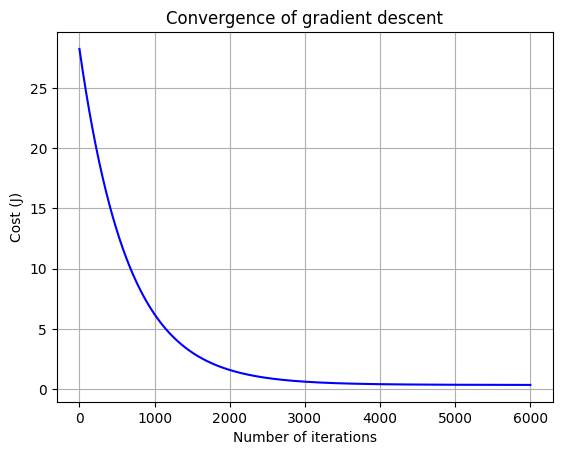

In [ ]:

plt.plot(range(1, lr.max_iterations + 1)[:6000], lr.history[:6000], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [6]:
lr.coef

array([1.53335983, 2.02420127])

In [7]:
lr.intercept

2.081851112878504

In [8]:
lr.score(X=X, Y=y)

0.9745464520082097

In [9]:
lr.predict(X)

array([ 5.63941221,  7.66361348,  9.19697331, 11.22117458])

In [10]:
lr.W

array([2.08185111, 1.53335983, 2.02420127])

In [56]:
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape((-1, 1))
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

model = LinearRegression(max_iterations=100000)

model.fit(X=X, Y=Y)
model.score(X=X, Y=Y)

0.5459774884141415

In [58]:
lasso1 = Lasso(max_iterations=100000, alpha= 10)

lasso1.fit(X=X, Y=Y)
lasso1.score(X=X, Y=Y)

0.5457920793692866

In [23]:
model.score(X=X, Y=Y) - model1.score(X= scaled_data, Y=Y)

-0.0002560585576898422

In [13]:
model.history

[576.3733346969173,
 363.37559548593447,
 245.34838351874595,
 179.94664341811864,
 143.70595327216776,
 123.62410796499333,
 112.49627038146014,
 106.33006558263187,
 102.91322181297323,
 101.01986565247827,
 99.97071091575087,
 99.38934865702281,
 99.06720155277341,
 98.88869185073044,
 98.78977511598227,
 98.73496277427884,
 98.70458974614779,
 98.68775913424051,
 98.67843270352232,
 98.67326452155336,
 98.67040052604105,
 98.66881333611397,
 98.66793365512089,
 98.66744602198362,
 98.66717563207007,
 98.66702562189492,
 98.66694231705257,
 98.66689597525328,
 98.66687011557319,
 98.66685560553289,
 98.66684738460393,
 98.66684264862485,
 98.666839843742,
 98.66683810892704,
 98.66683696706353,
 98.66683615376971,
 98.66683552254503,
 98.66683499221017,
 98.66683451778162,
 98.66683407433297,
 98.66683364805183,
 98.66683323128446,
 98.66683281978978,
 98.66683241121754,
 98.66683200426563,
 98.66683159821235,
 98.66683119265795,
 98.66683078738068,
 98.66683038225791,
 98.666829977

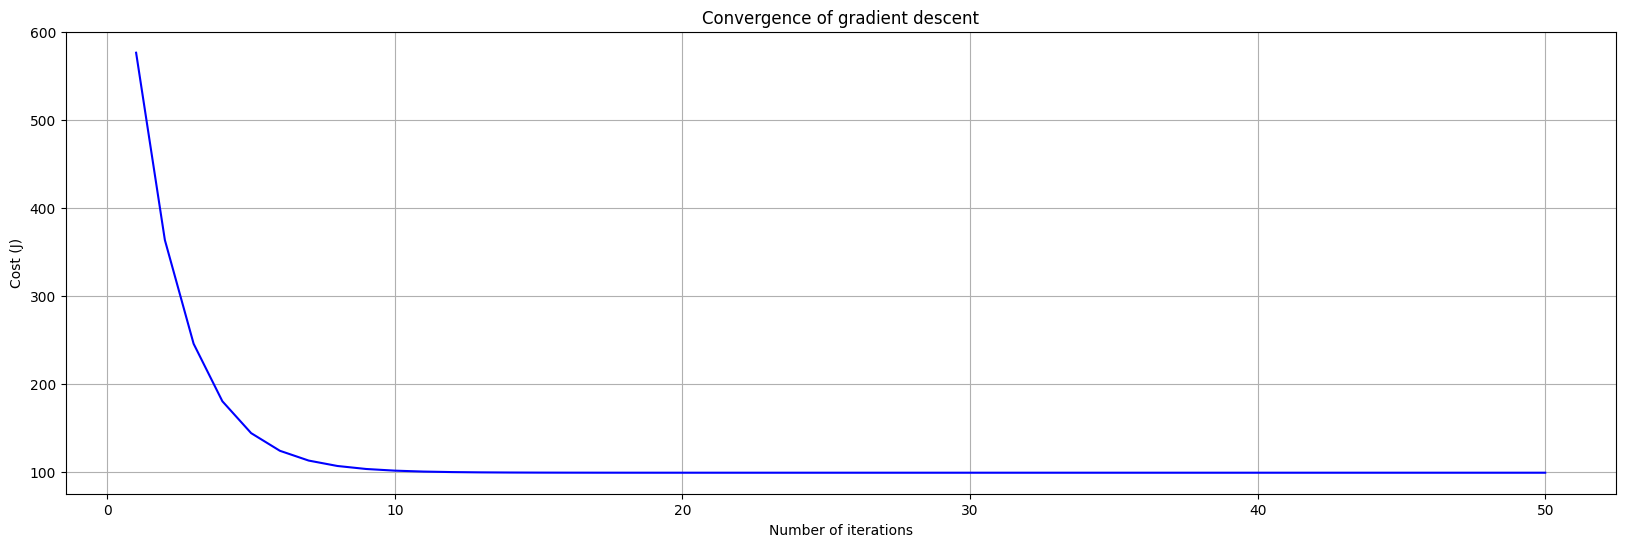

In [15]:

# Plot the cost history
plt.plot(range(1, model.max_iterations + 1)[:50], model.history[:50], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(X)

In [18]:
scaled_data

array([[-2.27804526],
       [ 0.4518826 ],
       [ 1.50911988],
       [-0.32454128],
       [ 1.28509037],
       [ 0.67568173],
       [ 0.2933656 ],
       [-1.3912398 ],
       [-0.24242579],
       [ 0.33749148],
       [-0.59276732],
       [ 0.57254147],
       [-0.75659079],
       [ 1.0705083 ],
       [ 0.8824727 ],
       [-0.13141931],
       [-0.68833799],
       [ 1.34825138],
       [-0.56681587],
       [-1.4542221 ]])

In [20]:
scaled_data.shape

(20, 1)

In [29]:
model1 = LinearRegression(max_iterations=1000000)

model1.fit(X=scaled_data, Y=Y)
model1.score(X=scaled_data, Y=Y)

0.5462335931125548

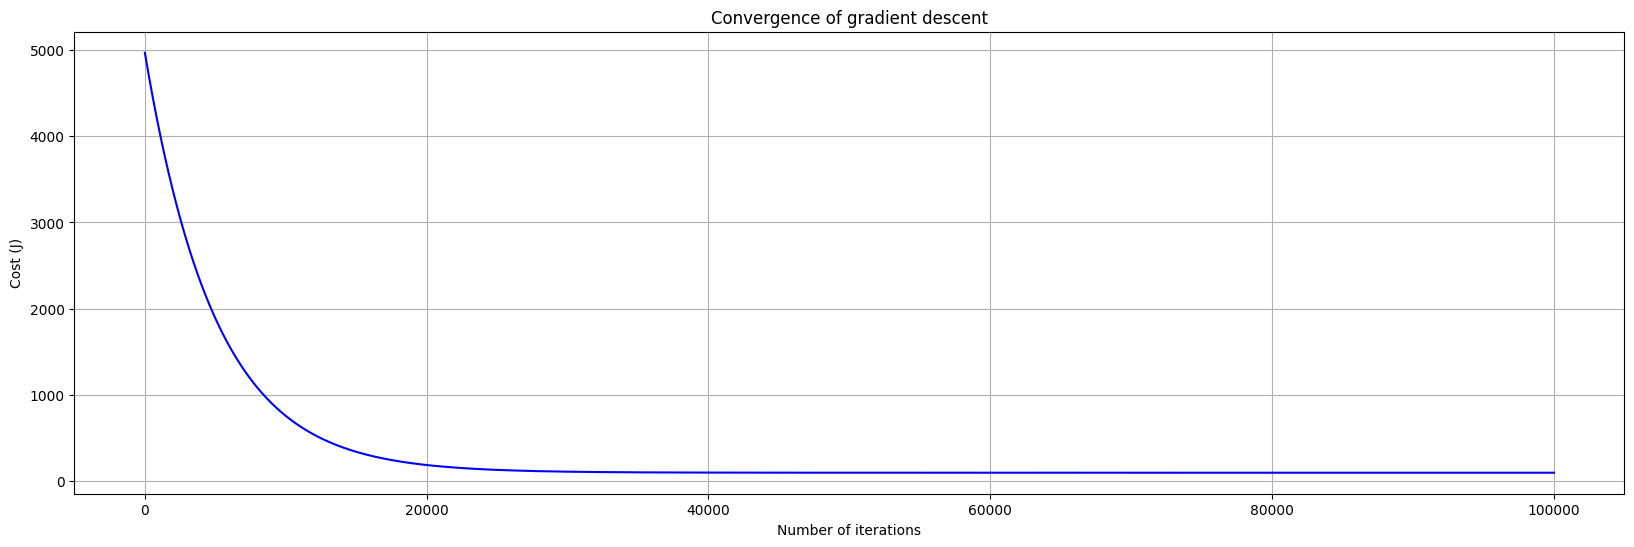

In [31]:
plt.plot(range(1, model1.max_iterations + 1)[:100000], model1.history[:100000], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [33]:
model1.coef, model1.intercept

(array([10.89343057]), 69.43422618042895)

In [34]:
model.coef, model.intercept

(array([1.39080275]), -0.018971053230349023)

In [35]:
array = np.array([-1, -3, -6, 7, 4])

In [36]:
np.sign(array)

array([-1, -1, -1,  1,  1])

In [38]:
np.sign(model1.coef)

array([1.])